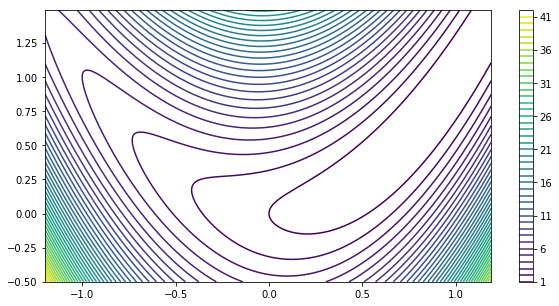

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from numpy import linalg as la
# Rosenbrock function
def rosen(x):
    y=10*(x[1]-x[0]**2)**2+(1-x[0])**2 # minimizer is at x=[1,1]
    return y
rcParams['figure.figsize'] = 10, 5
x0 = np.arange(-1.2, 1.2, 0.01) #https://www.python-course.eu/matplotlib_contour_plot.php
x1 = np.arange(-0.5, 1.5, 0.01) #https://www.cc.gatech.edu/classes/AY2015/cs2316_fall/codesamples/rosenbrock_demo.py
x0,x1 = np.meshgrid(x0, x1) #https://matplotlib.org/examples/pylab_examples/contour_demo.html
x=[x0,x1]
def plot_func(f,x):
    z=f(x)
    plt.contour(x[0],x[1],z,50)
    plt.colorbar()
    plt.show()
plot_func(rosen,x)

In [3]:
def backtrack_linesearch(f, gk, pk, xk, alpha = .1, beta = 0.8):
    t = 1
    while ( f(xk + t*pk) >= f(xk) + alpha * t * gk @ pk ):
        t *= beta
    return t
#Hessian 
def rosen_hessian(x):
    g = np.zeros([2,2])
    g[0,0] = -40*x[1]+120*x[0]**2 +2
    g[0,1] = -40*x[0]
    g[1,0]=-40*x[0]
    g[1,1]=20
    return g

def rosen_grad(x):
    g = np.zeros(2)
    g[0] = -40*x[0]*(x[1] - x[0]**2) + 2*x[0] - 2
    g[1] = 20*x[1] - 20*x[0]**2
    return g

def newton_bt(f, grad, hessian, x0, tol = 1e-5):
    x = x0
    history = np.array( [x0] )
    while ( la.norm(grad(x)) > tol ):
        p = la.solve(rosen_hessian(x),-grad(x))
        t = backtrack_linesearch(f, grad(x), p, x)
        x += t*p
        history = np.vstack( (history, x) )
    return x, history

### Performance assessment:

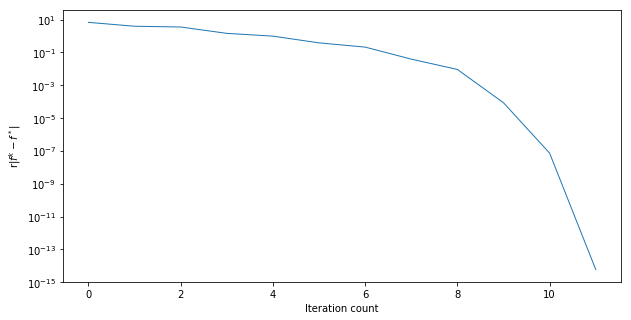

In [4]:
x_0 = np.array([-1.2, 1.0])
xstart, hist = newton_bt(rosen, rosen_grad,rosen_hessian, x_0)
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
    fhist[i] = rosen(hist[i,:])
plt.figure()
plt.autoscale(enable=True, axis=x, tight=True)
plt.semilogy(np.arange(0, nsteps), fhist, linewidth=1)
plt.xlabel('Iteration count')
plt.ylabel('r$|f^k - f^*|$')
plt.show()


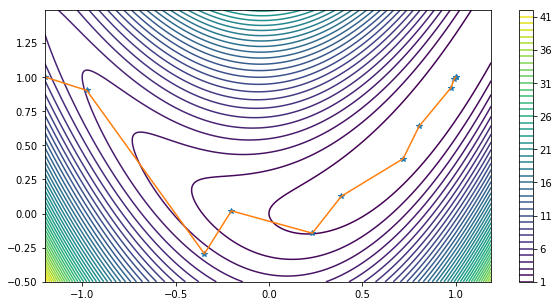

In [5]:
x1_val = [t[0] for t in hist]
x2_val = [t[1] for t in hist]
plt.plot(x1_val,x2_val,'*')
plt.plot(x1_val,x2_val)
plt.autoscale(enable=True, axis=x, tight=True)
plot_func(rosen,x)

## Problem 4

Let $\mathbf{x} \in \mathbb{R}^{100}$ and $\mathbf{A} \in \mathbb{R}^{500 \times 100}$. Let the function $f: \mathbb{R}^{100} \rightarrow \mathbb{R}$ be defined as: 
$$f(\mathbf{x}) = -\sum_{i=1}^{500} \log (1 - \mathbf{a_i}^\top \mathbf{x}) - \sum_{i = 1}^{100} \log (1 - x_i^2)$$

In [6]:
## the R^(100) function
def f(x,a):
    #extra conditions to ensure x<1 and (1-ax)>0
    if(np.all((1-a@x)>0)):
        while ~(np.all((1-x**2)>=0)):
            x=x/2
        y=-np.sum(np.log(1-a@x))-np.sum(np.log(1-x**2))  
    return y

def grad_f(x,a):
    g = np.zeros(100)
    for i in range(100):
        for j in range(a.shape[0]):
            g[i] = g[i]+a[j,i]/(1-a[j]@x)
        g[i]=g[i]+2*x[i]/(1-x[i]**2)
    return g

def hessian_f(x,a):
    g = np.zeros([100,100])
    for i in range(100):
        for j in range(100):
            if(i==j):
                for k in range(a.shape[0]):
                    g[j,j] = g[j,j]+a[k,j]**2/(1-a[k]@x)**2
                g[j,j]=g[j,j]+(2*x[j]**2+2)/(1-x[j]**2)**2
            else:
                for k in range(a.shape[0]):
                    g[i,j] = g[i,j]+a[k,i]*a[k,j]/(1-a[k]@x)**2
    return g

def backtrack_linesearch_f(f,a, gk, pk, xk, alpha = .1, beta = 0.8):
    t = 1
    while ( f(xk + t*pk,a) >= f(xk,a) + alpha * t * gk @ pk ):
        t *= beta
    return t


def newton_bt_f(f,a, grad, hessian_f, x0, tol = 1e-5):
    x = x0
    history = np.array( [x0] )
    while ( la.norm(grad(x,a)) > tol ):
        print(la.norm(grad(x,a)))
        p = la.solve(hessian_f(x,a),-grad(x,a))
        t = backtrack_linesearch_f(f,a, grad(x,a), p, x)
        #Back tracking condition
        if(np.all(x+t*p)>=0):
            x += t*p
        
        history = np.vstack( (history, x) )
    return x, history

In [7]:
a=-np.random.rand(500,100)
x=np.random.rand(100)

In [8]:
hist.shape

(12, 2)

182.89116196450698
993.5639045960991
550.7601491224741
272.89586929114483
134.32702949505975
65.32998120293784
31.025515631783737
14.020320127017847
5.682651503674257
1.7989703933265961
0.3165324949601117
0.013755293666851715
2.8306320147621873e-05


C:\Users\amir\Anaconda3\envs\machine_learning\lib\site-packages\matplotlib\axes\_base.py:2204: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if axis in ['x', 'both']:
C:\Users\amir\Anaconda3\envs\machine_learning\lib\site-packages\matplotlib\axes\_base.py:2207: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if axis in ['y', 'both']:


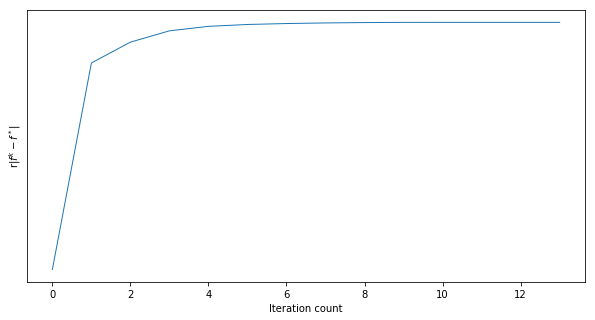

In [9]:
x0=x
xstart, hist=newton_bt_f(f,a,grad_f,hessian_f,x0)
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
    fhist[i] = f(hist[i],a)
plt.figure()
plt.autoscale(enable=True, axis=x, tight=True)
plt.semilogy(np.arange(0, nsteps), abs(fhist), linewidth=1)
plt.xlabel('Iteration count')
plt.ylabel('r$|f^k - f^*|$')
plt.show()

C:\Users\amir\Anaconda3\envs\machine_learning\lib\site-packages\matplotlib\axes\_base.py:2204: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if axis in ['x', 'both']:
C:\Users\amir\Anaconda3\envs\machine_learning\lib\site-packages\matplotlib\axes\_base.py:2207: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if axis in ['y', 'both']:


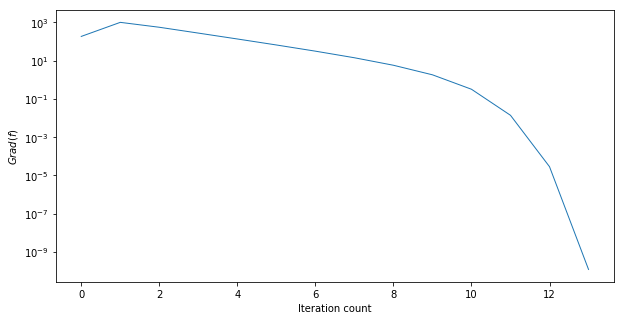

In [10]:
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
    fhist[i] = la.norm(grad_f(hist[i,:],a))
plt.figure()
plt.autoscale(enable=True, axis=x, tight=True)
plt.semilogy(np.arange(0, nsteps), fhist, linewidth=1)
plt.xlabel('Iteration count')
plt.ylabel('$Grad(f)$')
plt.show()

In [11]:
np.arange(0, nsteps)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

#### Note:
Newton's method has a quadratic convergence however it taks more time to find the hessian at each iteration. 